# Disambiguation Performance History

This notebook showcases the use of the `inventor_estimates_trend_plot()` function to easily obtain the history of PatentsView's disambiguation performance since 2017. 

By default, `inventor_estimates_trend_plot()` uses Binette's 2022 inventors benchmark for performance estimates. This benchmark covers 1976 to December 31, 2021. As such, disambiguations need to be restricted to this timeframe and performance estimates are only representative of this time period.

## Step 1: Download Required Files From PatentsView's Bulk Data Downloads

The first step is to download the file "g_persistent_inventor.tsv" and "g_patent.tsv" from PatentsView's bulk data downloads. The first file contains PatentsView's disambiguation history. The second file contains patent grant dates which are needed to subset the disambiguations to the required timeframe.

In [1]:
import pandas as pd
import wget
import zipfile
import os
from urllib.parse import urlparse

import plotly.graph_objects as go
import plotly.io as pio
pio.templates.default = "plotly_white" # Set plotly theme

def download_unzip(url, overwrite=False):
    basename = os.path.basename(urlparse(url).path)
    filename = basename.rstrip(".zip")
    if not os.path.isfile(filename) or overwrite:
        wget.download(url)
        with zipfile.ZipFile(basename, 'r') as zip_ref:
            zip_ref.extractall(".")
        os.remove(basename)
    return filename

persistent_inventor_file = download_unzip("https://s3.amazonaws.com/data.patentsview.org/download/g_persistent_inventor.tsv.zip")
patent_file = download_unzip("https://s3.amazonaws.com/data.patentsview.org/download/g_patent.tsv.zip")

## Step 2: Subset Disambiguations to the Required Timeframe

We can now subset disambiguations to the same timeframe as Binette's 2022 inventors benchmark.

In [2]:
persistent_inventor = pd.read_csv(persistent_inventor_file, sep="\t", dtype=str)
patent = pd.read_csv(patent_file, sep="\t", dtype=str)
persistent_inventor = persistent_inventor.merge(patent[["patent_id", "patent_date"]], on="patent_id", how="left")

persistent_inventor = persistent_inventor.query("patent_date < '2022-01-01'")

## Step 3: Plot Disambiguation History

`inventor_estimates_trend_plot()` is now ready to be called on the disambiguation history file.

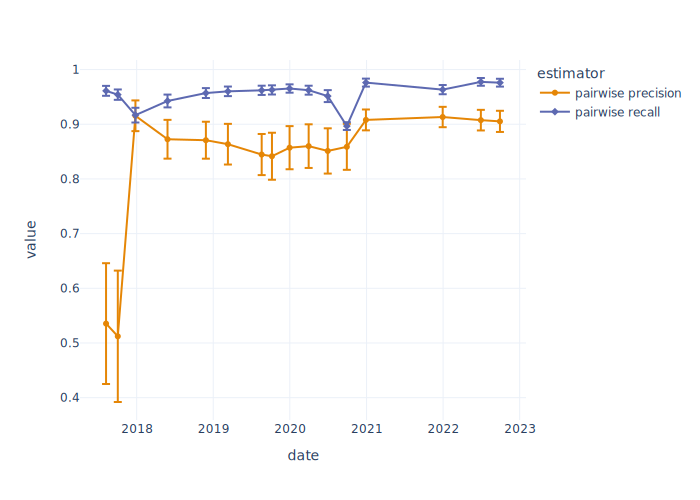

In [3]:
from pv_evaluation.benchmark import inventor_estimates_trend_plot

fig = inventor_estimates_trend_plot(persistent_inventor)
fig.show(renderer="svg")

The plot's appearance can be tweaked as desired:

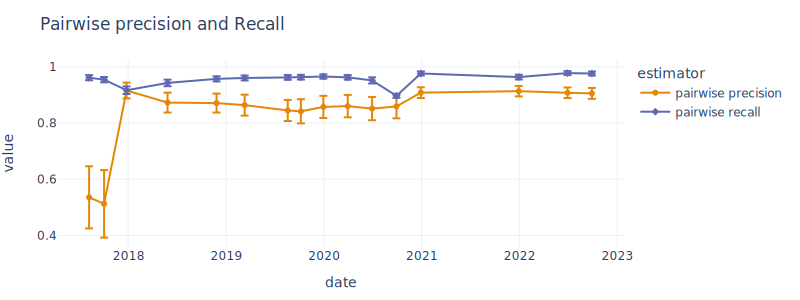

In [4]:
fig.update_layout(
    width=800,
    height=300,
    title="Pairwise precision and Recall"
)
fig['layout'].update(margin=dict(l=20,r=20,b=20,t=60))

fig.write_image("performance_trend.pdf")
fig.show(renderer="svg")